In [8]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from scipy import stats
import re
import nltk
import missingno as msno
from tqdm import tqdm
import json
import statistics
import math

nltk.download("stopwords", quiet=True)
from nltk.corpus import stopwords
from gensim.models import Phrases
from collections import Counter

# enabling Jupyter Lab to include the output of our plots directly in this notebook
%matplotlib inline


# used to avoid blurry output plots in Jupyter Notebooks
%config InLineBackend.figure_format = "retina"

pd.options.mode.chained_assignment = None

In [9]:
for i in range(12):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11


In [10]:
infile_df_concept_prob = open('data/df_concept_prob','rb')
df_concept_prob = pickle.load(infile_df_concept_prob)
infile_df_concept_prob.close()

In [11]:
df_concept_prob

,Disk Encryption,Differential Privacy
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
7747,0,0
7748,0,0
7749,0,0
7750,0,0


In [12]:
df_concept_prob.describe()

,Disk Encryption,Differential Privacy
count,7752.0,7752.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [13]:
df_concept_prob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Disk Encryption       7752 non-null   int64
 1   Differential Privacy  7752 non-null   int64
dtypes: int64(2)
memory usage: 121.2 KB


In [14]:
df_nonnull_AU=df_concept_prob.loc[df_concept_prob['Differential Privacy']!=0].copy()
df_nonnull_AU

,Disk Encryption,Differential Privacy


In [16]:
df_nonnull_ZP=df_concept_prob.loc[df_concept_prob['Disk Encryption']!=0].copy()
df_nonnull_ZP

,Disk Encryption,Differential Privacy


In [17]:
list_ZP = [float(x) for x in df_concept_prob['Disk Encryption'].tolist()]
list_AP = [float(x) for x in df_concept_prob['Differential Privacy'].tolist()]


In [17]:
sum(list_AP) / len(list_AP)

0.22752570673981884

In [18]:
sum(list_ZP) / len(list_ZP)

0.06103211109810376

In [3]:
infile_finaldicocitation_full = open('data/finaldicocitation_full','rb')
dfcitations = pickle.load(infile_finaldicocitation_full)
infile_finaldicocitation_full.close()

In [4]:
dfcitations

,paper,year,month,cituptothistime_year,cituptothistime_month,citforthemonth,citfortheyear
0,https://openalex.org/W2165167841,2012,January,0,0,0,0
1,https://openalex.org/W2165167841,2012,February,0,0,0,0
2,https://openalex.org/W2165167841,2012,March,0,0,0,0
3,https://openalex.org/W2165167841,2012,April,0,0,0,0
4,https://openalex.org/W2165167841,2012,May,0,0,0,0
...,...,...,...,...,...,...,...
26359603,https://openalex.org/W2566052079,2022,August,44,44,0,0
26359604,https://openalex.org/W2566052079,2022,September,44,44,0,0
26359605,https://openalex.org/W2566052079,2022,October,44,44,0,0
26359606,https://openalex.org/W2566052079,2022,November,44,44,0,0


In [5]:
mypapers= list(set(dfcitations.paper.tolist()))

In [6]:
len(mypapers)

199694

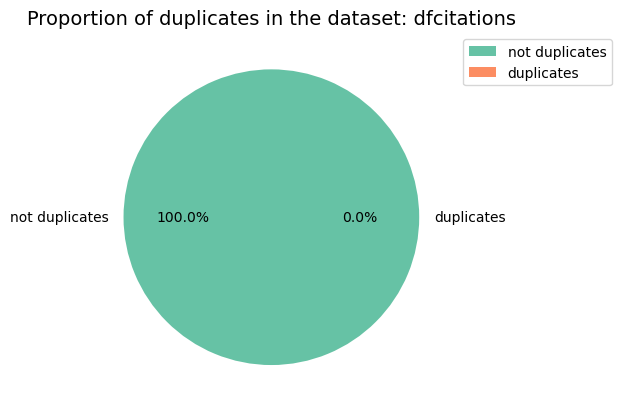

In [7]:
# little fancy visualization for dfcitations

dfcitations_noduplicates = dfcitations.drop_duplicates()

# data to be displayed
data = [len(dfcitations_noduplicates), len(dfcitations) - len(dfcitations_noduplicates)]

# labels for radability and intepretation
labels = ["not duplicates", "duplicates"]

# colors
colors = sns.color_palette("Set2")

# creating the pie chart
plt.pie(data, labels=labels, colors=colors, autopct="%0.1f%%")

# title
plt.title(
    "Proportion of duplicates in the dataset: dfcitations",
    color="black",  # I am using the 'white' color here, as I am using the 'dark mode' of Jupyter Lab.
    fontsize=14,
)

# legend
plt.legend(bbox_to_anchor=(1, 1))

# calling the pie chart
plt.show()